# Actividad 2: Clasificación de Noticias Usando RNNs y LSTMs

### Propósito de Aprendizaje
Adquirir habilidades prácticas en el preprocesamiento de datos textuales y en la implementación de modelos avanzados de RNN y LSTM para la clasificación de noticias en categorías especializadas como deportes, cultura, economía y justicia. Al finalizar, los estudiantes habrán desarrollado la capacidad de construir, entrenar y evaluar estos modelos, así como de comparar su rendimiento de manera crítica.

### Producto(s)
- **Cuaderno Jupyter (Jupyter Notebook):** Documentar el proceso completo de preprocesamiento, construcción, entrenamiento, evaluación y comparación de modelos RNN y LSTM.
- **Informe (PDF/Markdown):** Un documento que resuma los hallazgos, compare los modelos RNN y LSTM, y discuta las implicaciones prácticas de los resultados.


### Ejercicio 1: Carga y Exploración de Datos
**Objetivo:** Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.

**Acciones:**
- Cargar el archivo `Noticias.xlsx` que contiene las noticias.
- Explorar la distribución de la columna `Etiqueta` para ver cuántas noticias pertenecen a cada categoría.
- Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

**Contexto:** La columna `Etiqueta` en el conjunto de datos contiene varias categorías, algunas de las cuales no son especializadas o no contienen un enfoque específico (por ejemplo, "archivo"). Para esta actividad, nos centraremos en noticias de las categorías especializadas: deportes, cultura, economía y justicia. Estas categorías son relevantes porque representan temas con un enfoque claro y específico, lo que hace que la clasificación sea más útil y aplicable en el análisis de noticias.


In [1]:
# Cargar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt

In [2]:
# Cargar el conjunto de datos
file_path = '../../Datos/Datos Crudos/Noticias.xlsx'
data = pd.read_excel(file_path)
data.shape

(14396, 6)

In [3]:
## Quitamos los nulos
data = data.dropna()
data.shape

(11483, 6)

In [4]:
14396/11483 - 1

0.2536793520856919

In [5]:
# Mostrar las primeras filas del conjunto de datos
data.head()

Columna1                                            Enlaces  \
0         0  https://www.eltiempo.com/agresion-contra-un-op...   
1         1  https://www.eltiempo.com/archivo/documento/CMS...   
2         2  https://www.eltiempo.com/archivo/documento/CMS...   
3         3  https://www.eltiempo.com/archivo/documento/CMS...   
4         4  https://www.eltiempo.com/archivo/documento/CMS...   

                                              Título  \
0  Operador de grúa quedó inconsciente tras agres...   
1   Usaquén, primera en infracciones por mal parqueo   
2  'Me atracaron y vi un arma que me heló la sang...   
3  Escoltas mal estacionados, dolor de cabeza de ...   
4  Radicado primer proyecto que autorizaría union...   

                                                info  \
0  El conductor de una moto le lanzó el casco y p...   
1  La localidad ocupa el primer lugar en comparen...   
2  Un ciudadano relata cómo cuatro hombres lo rob...   
3  Las zonas de restaurantes se convierten en par...   
4  El representante de 'la U', Miguel Gómez, dijo...   

                                           contenido  Etiqueta  
0  Las autoridades están buscando al conductor de...  colombia  
1  "Los andenes son para los peatones", reclama e...   archivo  
2  A las 7 de la noche me había quedado de encont...   archivo  
3  Atravesados. Eso es lo que se les pasa por la ...   archivo  
4  “Estamos proponiendo la figura de un contrato ...   archivo

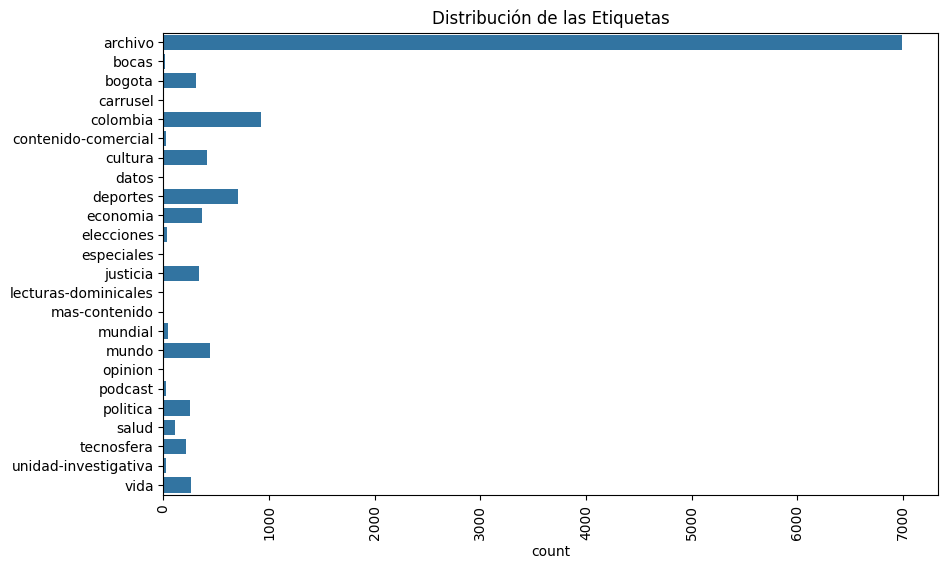

In [6]:
# Visualizar la distribución de las etiquetas
plt.figure(figsize=(10, 6))
sns.countplot(sorted(data['Etiqueta']))
plt.title('Distribución de las Etiquetas')
plt.xticks(rotation=90)
plt.show()

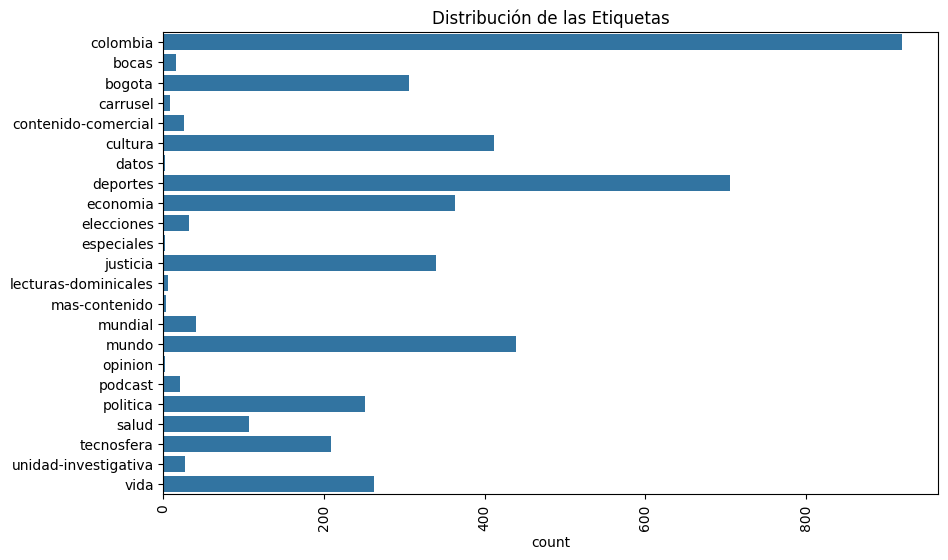

In [7]:
# Visualizar la distribución de las etiquetas
plt.figure(figsize=(10, 6))
sns.countplot([x for x in data['Etiqueta'] if x != 'archivo'])
plt.title('Distribución de las Etiquetas')
plt.xticks(rotation=90)
plt.show()

### Ejercicio 2: Filtrado de Datos
**Objetivo:** Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.

**Acciones:**
- Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.
- Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.


In [8]:
# Filtrar las categorías relevantes y excluir "archivo"
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
data_filtrada = data[data['Etiqueta'].isin(categorias_relevantes)]
data_filtrada.head()

Columna1                                            Enlaces  \
10487     10487  https://www.eltiempo.com/cultura/al-interior-d...   
10488     10488  https://www.eltiempo.com/cultura/arte-y-teatro...   
10489     10489  https://www.eltiempo.com/cultura/arte-y-teatro...   
10490     10490  https://www.eltiempo.com/cultura/arte-y-teatro...   
10491     10491  https://www.eltiempo.com/cultura/arte-y-teatro...   

                                                  Título  \
10487  Al interior de, aparte, roquero, rock / El len...   
10488  Antonina Canal: 20 años de danza oriental en C...   
10489  Aparece en Holanda cuadro de Picasso, robado h...   
10490  Así será la programación del Carnaval de las A...   
10491          ‘Fragmentos’ se viste de charlas y música   

                                                    info  \
10487  'Al interior de' es el reemplazo sofisticado e...   
10488  La bailarina habló con EL TIEMPO de su trayect...   
10489  La pintura era propiedad de un jeque saudí, Ab...   
10490  El evento con algunos de los artistas más repr...   
10491  El lugar donde está el monumento de la artista...   

                                               contenido Etiqueta  
10487  Citas: “Los crímenes de violencia sexual comet...  cultura  
10488  Con motivo de la celebración de los 20 años de...  cultura  
10489  El cuadro Busto de mujer, del artista español ...  cultura  
10490  El Carnaval de las Artes, organizado en Barran...  cultura  
10491  Louise du Toit, filósofa; el doctor Denis Mukw...  cultura

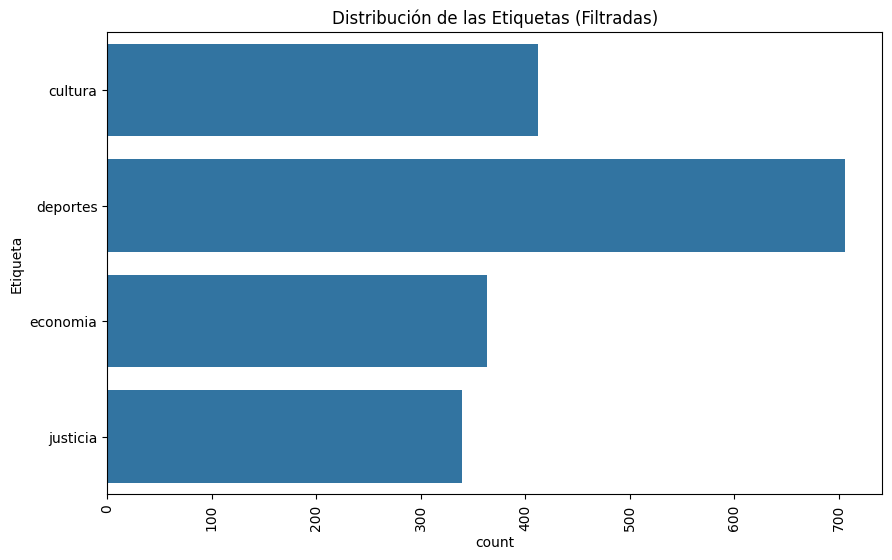

In [9]:
# Visualizar la distribución de las etiquetas después del filtrado
plt.figure(figsize=(10, 6))
sns.countplot(data_filtrada['Etiqueta'])
plt.title('Distribución de las Etiquetas (Filtradas)')
plt.xticks(rotation=90)
plt.show()

Para determinar si el desbalance es bastante, se pueden utilizar estos métodos:

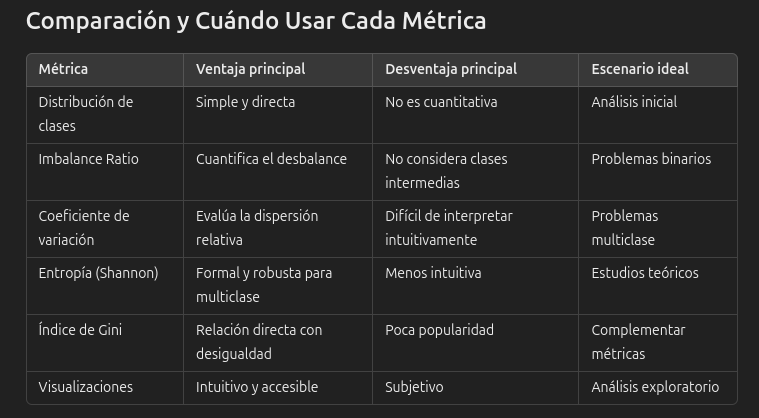

El **Índice de Shannon (entropía)** es una medida que evalúa la diversidad o la incertidumbre en un conjunto de datos, ampliamente utilizado en campos como la ecología, la teoría de la información y el aprendizaje automático. En el contexto de datasets multiclase, este índice ayuda a medir qué tan equilibrada está la distribución de las clases.

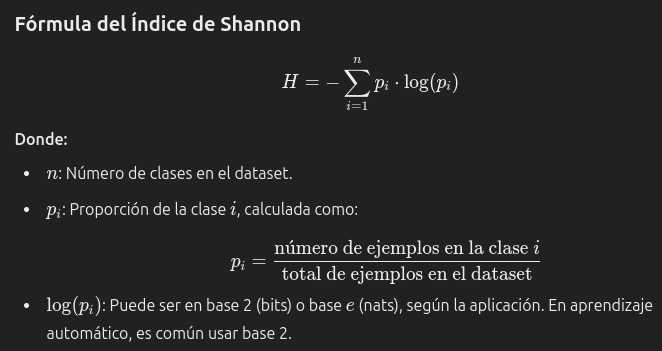

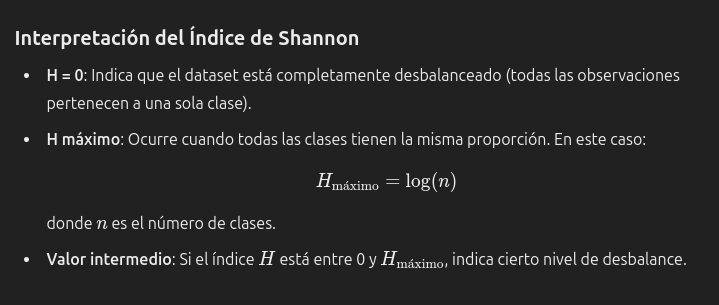

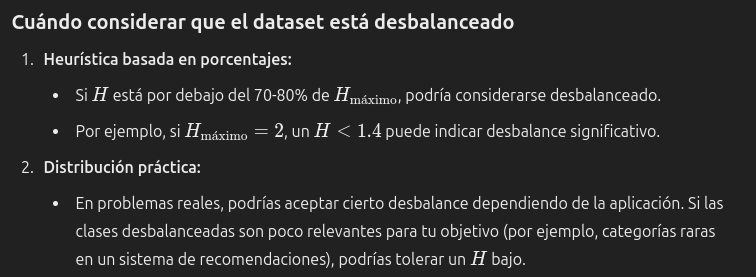

In [37]:
def h_max(n):
    res = 0
    for nn in range(1,n+1):
        res += 1/n*mt.log2(1/n)
    return -res

h_max_v= h_max(len(data_filtrada['Etiqueta'].unique()))
h_max_v

2.0

In [35]:
evc = data_filtrada['Etiqueta'].value_counts()
h = 0
for x in evc.index:
    m = evc.loc[x]/evc.sum()
    h += m*mt.log2(m)
h = -h
h

1.9306468429846206

In [38]:
h/h_max_v

0.9653234214923103

El **Índice de Gini** es una métrica utilizada para medir la desigualdad o el desbalance en un conjunto de datos. Aunque se originó en estudios socioeconómicos para medir la distribución de ingresos, se ha adaptado al campo del aprendizaje automático y la estadística para evaluar la distribución de clases en problemas de clasificación, especialmente en problemas multiclase.

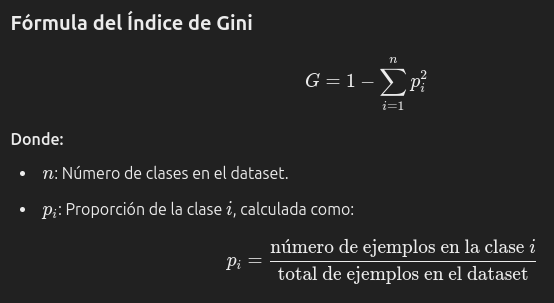

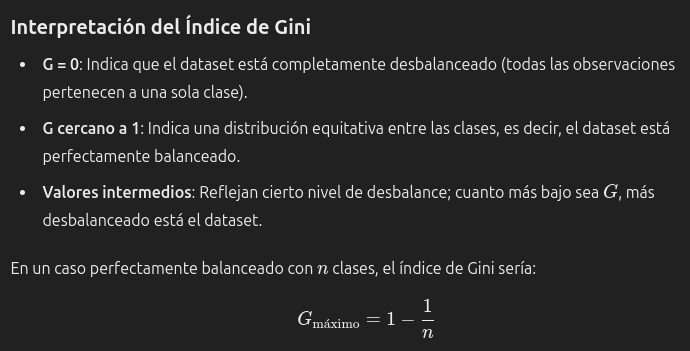

In [30]:
g_max = 1 - 1/len(data_filtrada['Etiqueta'].unique())
g_max

0.75

In [33]:
evc = data_filtrada['Etiqueta'].value_counts()
res = 0
for x in evc.index:
    m = evc.loc[x]/evc.sum()
    res += m**2
res = 1 - res
res

0.7238044922110856

### Ejercicio 3: Preprocesamiento de Texto
**Objetivo:** Preparar los datos textuales para el entrenamiento del modelo.

**Acciones:**
- Convertir todo el texto a minúsculas para uniformidad.
- Eliminar puntuación y números para reducir el ruido en los datos.
- Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.
- Tokenizar el texto, es decir, dividir el texto en palabras individuales.


Para este ejercicio debe instalarse la libreria keras y tensorflow, para ello se debe ejecutar el siguiente comando en la consola de anaconda:
```python
pip install keras tensorflow
```

In [43]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import keras_nlp
import tensorflow as tf

2024-12-01 16:48:31.434507: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 16:48:31.435467: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 16:48:31.441101: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 16:48:31.452798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733089711.471028 2053712 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733089711.47

In [44]:
# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/sda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
# Función de preprocesamiento
def preprocess_text(text, a:bool=False):
    if a: print(text)
    text = text.lower()
    if a: print(text)
    text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])
    if a: print(text)
    tokens = word_tokenize(text)
    if a: print(tokens)
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    if a: print(tokens)
    return ' '.join(tokens)

In [52]:
data_filtrada['contenido'].iloc[0]

"Citas: “Los crímenes de violencia sexual cometidos al interior de un grupo armado” (La Silla Vacía), “Confirman que periodista saudí murió tras riña al interior de consulado en Estambul” (AN), “Menor de edad intentó suicidarse al interior de su casa” (Ondas de Ibagué). Tres casos en los que “al interior de” no es otra cosa que el reemplazo sofisticado e innecesario de la simple preposición “en”, “… en un grupo armado”, “… murió en el consulado…”, “… intentó suicidarse en su casa”. Se trata de un galicismo introducido al país por los violentólogos de la Sorbona. “Al interior de” es válido solo con verbos de movimiento, “Después de recorrer la costa atlántica, se dirigió al interior del país”. Nótese cómo este “al interior de” es necesario para el significado, y no puede reemplazarse por “en”. ¡Ese es el uso correcto! Citas: “Ahora consigo ganar 1300 dólares por semana a parte de mi salario” (aviso), “Estudio en la Javeriana por las oportunidades que me da para involucrarme en otras exp

In [55]:
preprocess_text(data_filtrada['contenido'].iloc[0],True)

Citas: “Los crímenes de violencia sexual cometidos al interior de un grupo armado” (La Silla Vacía), “Confirman que periodista saudí murió tras riña al interior de consulado en Estambul” (AN), “Menor de edad intentó suicidarse al interior de su casa” (Ondas de Ibagué). Tres casos en los que “al interior de” no es otra cosa que el reemplazo sofisticado e innecesario de la simple preposición “en”, “… en un grupo armado”, “… murió en el consulado…”, “… intentó suicidarse en su casa”. Se trata de un galicismo introducido al país por los violentólogos de la Sorbona. “Al interior de” es válido solo con verbos de movimiento, “Después de recorrer la costa atlántica, se dirigió al interior del país”. Nótese cómo este “al interior de” es necesario para el significado, y no puede reemplazarse por “en”. ¡Ese es el uso correcto! Citas: “Ahora consigo ganar 1300 dólares por semana a parte de mi salario” (aviso), “Estudio en la Javeriana por las oportunidades que me da para involucrarme en otras expe

'citas “ crímenes violencia sexual cometidos interior grupo armado ” silla vacía “ confirman periodista saudí murió tras riña interior consulado estambul ” an “ menor edad intentó suicidarse interior casa ” ondas ibagué tres casos “ interior ” cosa reemplazo sofisticado innecesario simple preposición “ ” “ … grupo armado ” “ … murió consulado… ” “ … intentó suicidarse casa ” trata galicismo introducido país violentólogos sorbona “ interior ” válido solo verbos movimiento “ después recorrer costa atlántica dirigió interior país ” nótese cómo “ interior ” necesario significado puede reemplazarse “ ” ¡ese uso correcto citas “ ahora consigo ganar dólares semana parte salario ” aviso “ estudio javeriana oportunidades da involucrarme experiencias parte académicas ” aviso “ parte despedido dayro moreno expulsado ” minuto mejor tres casos “ aparte ” adverbio significa ‘ separadamente ’ ‘ distinción ’ pregunta ¿por ustedes escriben roquero q rockero k corresponde derivado rock dary suárez j res

In [ ]:
# Aplicar preprocesamiento
data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)

/tmp/ipykernel_2053712/3893692846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)


In [58]:
data_filtrada['contenido_preprocesado'].head()

10487    citas “ crímenes violencia sexual cometidos in...
10488    motivo celebración años enseñanza danza orient...
10489    cuadro busto mujer artista español pablo picas...
10490    carnaval artes organizado barranquilla fundaci...
10491    louise du toit filósofa doctor denis mukwege p...
Name: contenido_preprocesado, dtype: object

In [59]:
# Tokenizar el texto
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

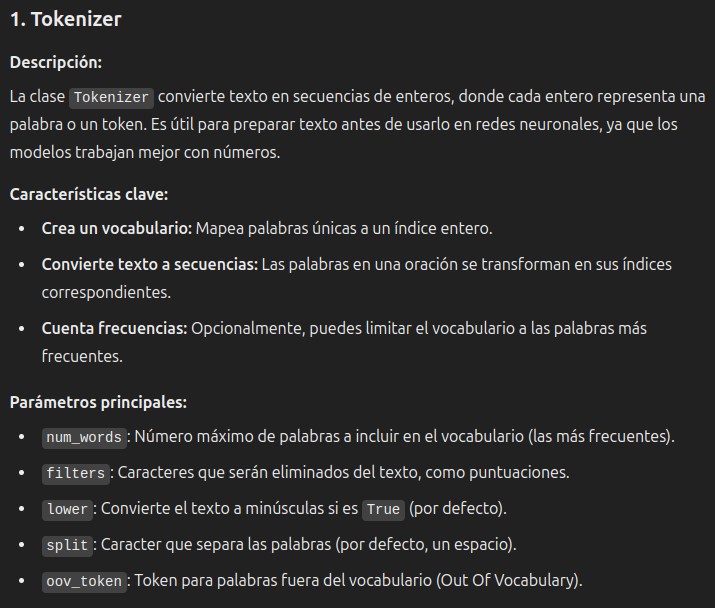

In [ ]:
# Dataset de texto
texts = ["Me encanta el aprendizaje profundo", "El aprendizaje automático es fascinante"]

# Inicializar el Tokenizer
tokenizer = Tokenizer(num_words=10, oov_token="<OOV>")

# Ajustar el Tokenizer al texto
tokenizer.fit_on_texts(texts)

# Convertir texto en secuencias
sequences = tokenizer.texts_to_sequences(texts)

print("Vocabulario:", tokenizer.word_index)
print("Secuencias:", sequences)

Vocabulario: {'<OOV>': 1, 'el': 2, 'aprendizaje': 3, 'me': 4, 'encanta': 5, 'profundo': 6, 'automático': 7, 'es': 8, 'fascinante': 9}
Secuencias: [[4, 5, 2, 3, 6], [2, 3, 7, 8, 9]]


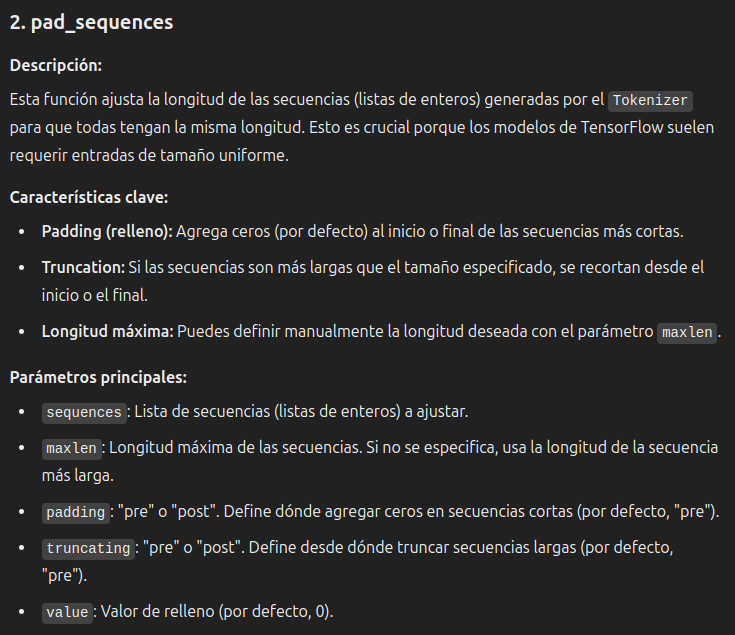

In [61]:
# Secuencias generadas
sequences = [[3, 4, 5], [5, 2, 7, 8, 9], [2]]

# Rellenar secuencias para que todas tengan la misma longitud
padded_sequences = pad_sequences(sequences, maxlen=5, padding='post', truncating='pre')

print("Secuencias originales:", sequences)
print("Secuencias rellenadas:", padded_sequences)

Secuencias originales: [[3, 4, 5], [5, 2, 7, 8, 9], [2]]
Secuencias rellenadas: [[3 4 5 0 0]
 [5 2 7 8 9]
 [2 0 0 0 0]]


In [67]:
# Tokenización y padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_filtrada['contenido_preprocesado'])
sequences = tokenizer.texts_to_sequences(data_filtrada['contenido_preprocesado'])

In [100]:
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 1820,
 'word_counts': '{"citas": 16, "\\u201c": 3474, "cr\\u00edmenes": 37, "violencia": 217, "sexual": 132, "cometidos": 17, "interior": 85, "grupo": 618, "armado": 62, "\\u201d": 3490, "silla": 20, "vac\\u00eda": 9, "confirman": 8, "periodista": 79, "saud\\u00ed": 7, "muri\\u00f3": 60, "tras": 734, "ri\\u00f1a": 3, "consulado": 7, "estambul": 14, "an": 3, "menor": 120, "edad": 159, "intent\\u00f3": 59, "suicidarse": 5, "casa": 496, "ondas": 2, "ibagu\\u00e9": 41, "tres": 850, "casos": 2157, "cosa": 88, "reemplazo": 19, "sofisticado": 4, "innecesario": 5, "simple": 32, "preposici\\u00f3n": 4, "\\u2026": 47, "consulado\\u2026": 1, "trata": 228, "galicismo": 1, "introducido": 4, "pa\\u00eds": 1222, "violent\\u00f3logos": 1, "sorbona": 2, "v\\u00e1lido": 8, "solo": 1039, "verbos": 2, "movimiento": 86, "despu\\u00e9s": 774, "re

In [66]:
len(set([word for phrase in data_filtrada['contenido_preprocesado'] for word in phrase.split(' ')]))

49496

In [69]:
word_index = tokenizer.word_index
len(word_index)

49496

In [124]:
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar algunas secuencias preprocesadas
padded_sequences[:5]

## También puede usar las técnicas de preprocesamiento de texto y de embedding que hicimos anteriormente

array([[ 1220, 19886,     6,   113,  1220, 27325,   318,  2949,     5,
         2880,     6,  6795,  6795,  7846, 27326,  1220,  2567,     5,
        27327,  1187,  7270,  4100,  1496,     6,   450,  7270, 27328,
         1772, 27329,   122,     5,   149,     6,   313, 27330,  1994,
          644,  7270,     5,    54,   313,  3326,  1600,   650,   954,
         4626, 11714,    24,     1,    46,    29,    17,    43,    38,
           47,    40,    15,    30,    39,    25,     7,    22,     4,
            1,    32,    31,    33,    23,    27,    45,    41,     2,
           13,    26,    50,     4,     1,    34,     8,    28,    21,
            9,    48,    12,     2,     1,    37,    42,    35,    16,
            3,    20,     1,    44,    11,    18,    19,    49,     3,
           36],
       [  220,    68,    69,    51,    92,   323,   215,  1708, 27354,
         9338,   178, 15995,  1253,   221,  4428,   239,   791,   215,
          180,    55,   726,  3526,  9346,    96,   410,  227

### Ejercicio 4: División del Conjunto de Datos
**Objetivo:** Crear conjuntos de datos de entrenamiento y validación para evaluar el modelo.

**Acciones:**
- Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.
- Asegurarse de que la división sea aleatoria pero mantenga una proporción similar de las categorías en ambos conjuntos.

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [126]:
# Codificación de etiquetas
label_encoder = LabelEncoder()
data_filtrada['Etiqueta_codificada'] = label_encoder.fit_transform(data_filtrada['Etiqueta'])
label_encoder.classes_

/tmp/ipykernel_2053712/4008533881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['Etiqueta_codificada'] = label_encoder.fit_transform(data_filtrada['Etiqueta'])


array(['cultura', 'deportes', 'economia', 'justicia'], dtype=object)

In [127]:
# División del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, data_filtrada['Etiqueta_codificada'], test_size=0.2, random_state=42)

# Mostrar tamaño de los conjuntos de datos
len(X_train), len(X_val)


(1456, 364)

## Ejercicio 5: Construcción y Entrenamiento de Modelos RNN

**Objetivo:** Implementar un modelo de Red Neuronal Recurrente (RNN) para clasificar noticias en las categorías especializadas.

**Acciones:**
- Construir un modelo RNN utilizando capas de Embedding, SimpleRNN y Dense.
- Compilar el modelo con una función de pérdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
- Evaluar el rendimiento del modelo en términos de precisión y pérdida.

In [128]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [129]:
# Construcción del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))

/home/sda/Dropbox/Estudio!/Especialización/Semestre 1b + 2a/4. NLP/nlp_ean/Cuadernos/veNLP/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [130]:
# Compilación del modelo
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

La función de pérdida **sparse_categorical_crossentropy** se utiliza en modelos de aprendizaje profundo para problemas de clasificación multiclase. Es particularmente útil cuando las etiquetas de las clases están representadas como enteros (en formato escalar), en lugar de codificación one-hot (donde cada clase se representa como un vector binario).

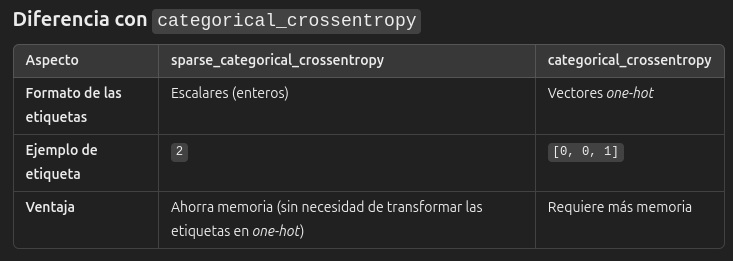

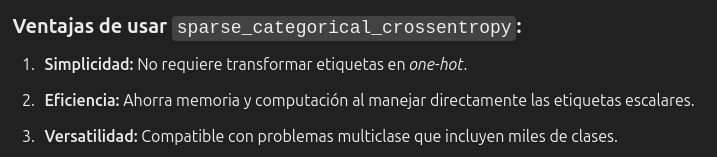

In [131]:
# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.3654 - loss: 1.3622 - val_accuracy: 0.4038 - val_loss: 1.2543
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.6685 - loss: 0.9570 - val_accuracy: 0.6731 - val_loss: 0.8566
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9310 - loss: 0.3446 - val_accuracy: 0.7500 - val_loss: 0.6753
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9889 - loss: 0.0817 - val_accuracy: 0.7115 - val_loss: 0.8221
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 1.0000 - loss: 0.0245 - val_accuracy: 0.6978 - val_loss: 0.9329
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 1.0000 - loss: 0.0131 - val_accuracy: 0.7088 - val_loss: 0.9306
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.6841 - val_loss: 1.0261
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 0.6758 - val_loss: 1.

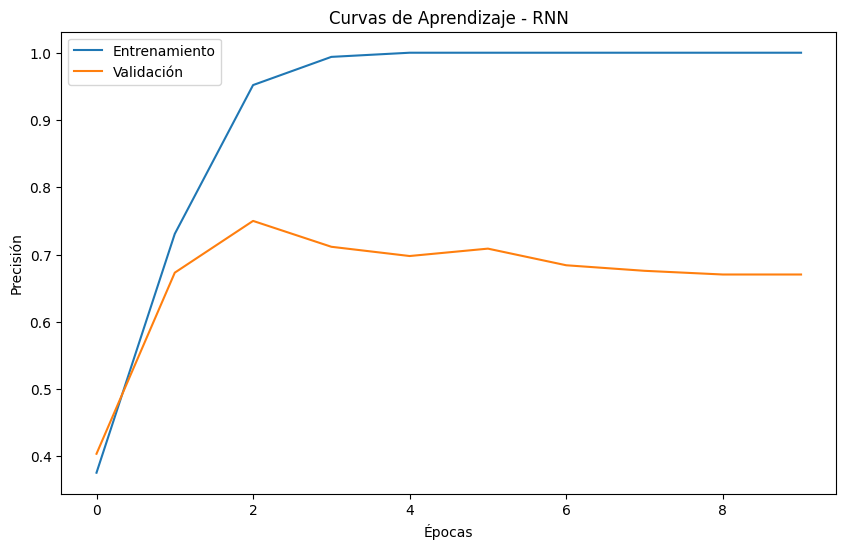

In [132]:
# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()


## Ejercicio 6: Construcción y Entrenamiento de Modelos LSTM

**Objetivo:** Implementar un modelo de Red Neuronal LSTM (Long Short-Term Memory) para clasificar noticias en las categorías especializadas.

**Acciones:**

- Construir un modelo LSTM utilizando capas de Embedding, LSTM y Dense.
- Compilar el modelo con una función de pérdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
- Evaluar el rendimiento del modelo en términos de precisión y pérdida.

In [133]:
from keras.layers import LSTM

In [134]:
# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(units=64, return_sequences=False))
model_lstm.add(Dense(units=len(categorias_relevantes), activation='softmax'))

In [135]:
# Compilación del modelo
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [136]:
# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.3801 - loss: 1.3608 - val_accuracy: 0.3709 - val_loss: 1.3510
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.3729 - loss: 1.3499 - val_accuracy: 0.3709 - val_loss: 1.3531
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.3869 - loss: 1.3330 - val_accuracy: 0.3709 - val_loss: 1.3458
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.3886 - loss: 1.3300 - val_accuracy: 0.3709 - val_loss: 1.3465
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.3913 - loss: 1.3317 - val_accuracy: 0.3709 - val_loss: 1.3489
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.3914 - loss: 1.3298 - val_accuracy: 0.3709 - val_loss: 1.3470
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.3917 - loss: 1.3247 - val_accuracy: 0.3709 - val_loss: 1.3484
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.3693 - loss: 1.3415 - val_accuracy: 0.

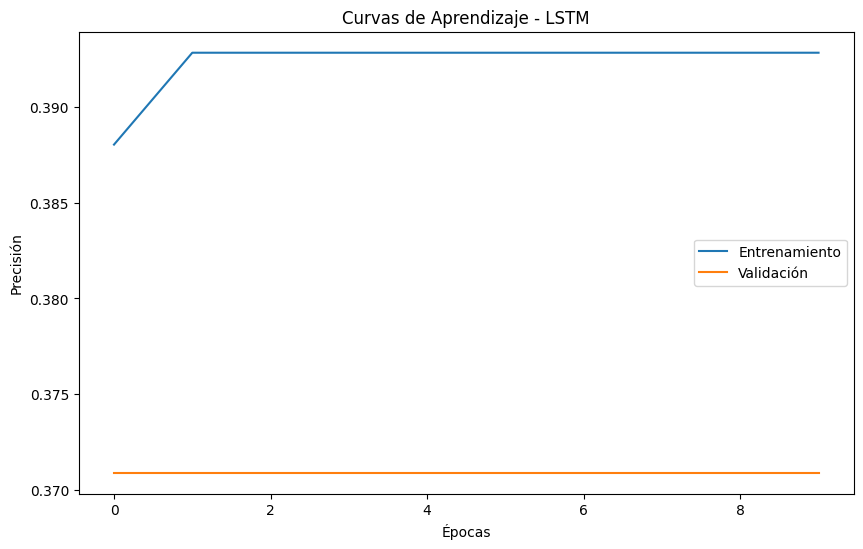

In [137]:
# Visualización de resultados del modelo LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()


## Ejercicio 7: Comparación de Modelos y Análisis de Resultados

**Objetivo:** Comparar los modelos RNN y LSTM en términos de rendimiento y analizar los resultados obtenidos.

**Acciones:**
- Comparar la precisión y la pérdida de los modelos RNN y LSTM en el conjunto de datos de validación.
- Calcula otras métricas de evaluación como la sensibilidad, la especificidad y el puntaje F1.
- Discutir las fortalezas y debilidades de cada modelo en función de los resultados obtenidos.

In [138]:
from sklearn.metrics import classification_report

In [139]:
# Evaluar modelos en el conjunto de validación
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = model_lstm.predict(X_val).argmax(axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [140]:
# Calcular métricas de rendimiento
report_rnn = classification_report(y_val, y_pred_rnn, target_names=categorias_relevantes)
report_lstm = classification_report(y_val, y_pred_lstm, target_names=categorias_relevantes)

/home/sda/Dropbox/Estudio!/Especialización/Semestre 1b + 2a/4. NLP/nlp_ean/Cuadernos/veNLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sda/Dropbox/Estudio!/Especialización/Semestre 1b + 2a/4. NLP/nlp_ean/Cuadernos/veNLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sda/Dropbox/Estudio!/Especialización/Semestre 1b + 2a/4. NLP/nlp_ean/Cuadernos/veNLP/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defi

In [141]:
print("RNN Classification Report:")
print(report_rnn)

print("LSTM Classification Report:")
print(report_lstm)

RNN Classification Report:
              precision    recall  f1-score   support

    deportes       0.71      0.59      0.65        79
     cultura       0.77      0.76      0.76       135
    economia       0.50      0.65      0.56        78
    justicia       0.71      0.61      0.66        72

    accuracy                           0.67       364
   macro avg       0.67      0.65      0.66       364
weighted avg       0.69      0.67      0.67       364

LSTM Classification Report:
              precision    recall  f1-score   support

    deportes       0.00      0.00      0.00        79
     cultura       0.37      1.00      0.54       135
    economia       0.00      0.00      0.00        78
    justicia       0.00      0.00      0.00        72

    accuracy                           0.37       364
   macro avg       0.09      0.25      0.14       364
weighted avg       0.14      0.37      0.20       364



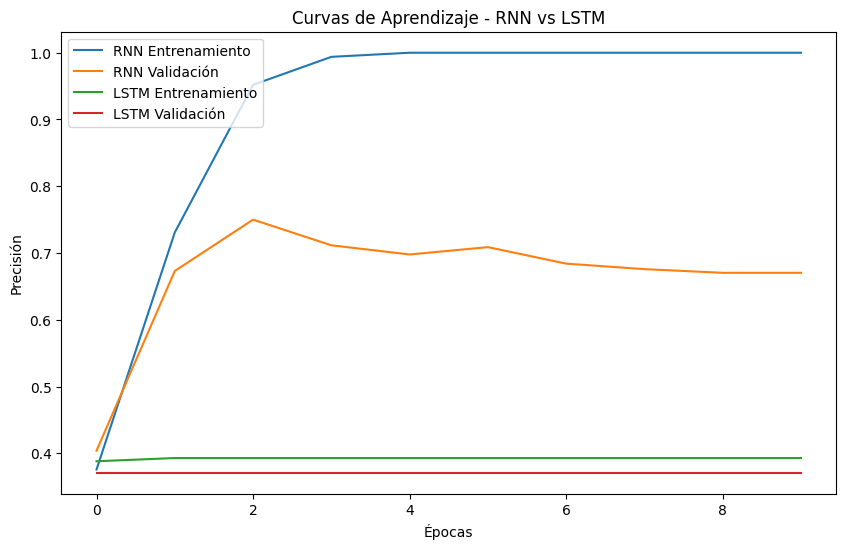

In [142]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validación')
plt.plot(history_lstm.history['accuracy'], label='LSTM Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN vs LSTM')
plt.show()


## Ejercicio 8: Conclusiones y Recomendaciones

**Objetivo:** Resumir los hallazgos y proporcionar recomendaciones basadas en los resultados obtenidos.

**Acciones:**
- Resumir las principales conclusiones de la comparación entre los modelos RNN y LSTM.
- Proporcionar recomendaciones para mejorar el rendimiento de los modelos o explorar enfoques alternativos.
- Discutir las implicaciones prácticas de los resultados y cómo podrían aplicarse en un contexto real.
